<a href="https://colab.research.google.com/github/sritharunkollu/Data-Analytics/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/netflix1.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.shape

(8790, 10)

In [ ]:
columns = list(data)
print(columns)

['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']


In [ ]:
data.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
(data[data.columns[1:10]]==0).sum()

,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
type_counts = data['type'].value_counts()
print(type_counts)

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


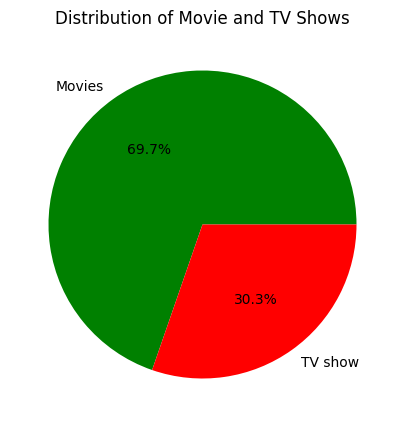

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(type_counts, labels=['Movies' ,'TV show'], autopct='%1.1f%%', colors=['green','red'])
plt.title('Distribution of Movie and TV Shows')
plt.show()

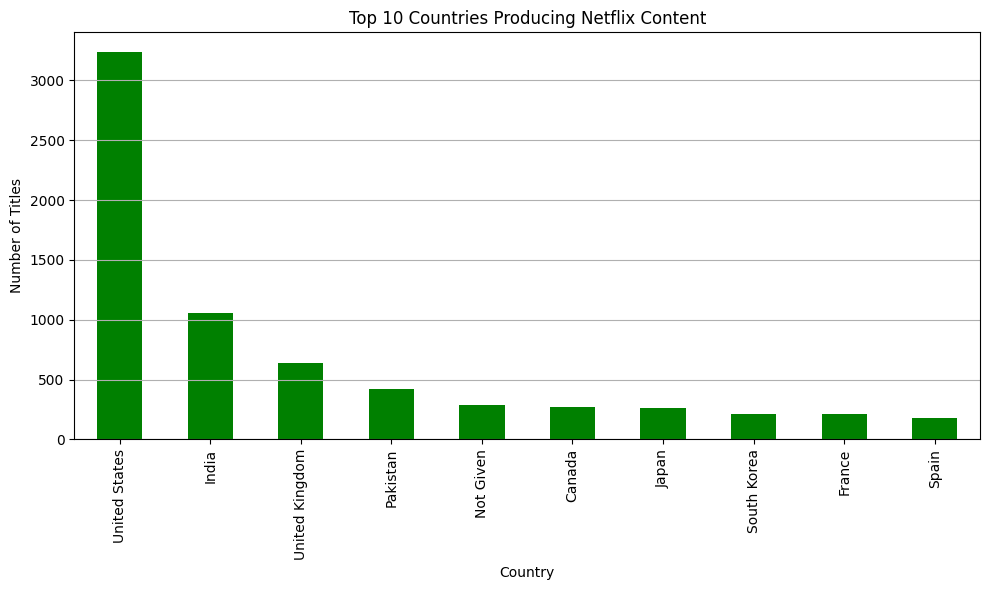

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix1.csv")

df_clean = df.dropna(subset=['country'])

df_clean['country'] = df_clean['country'].str.split(',')

df_exploded = df_clean.explode('country')

df_exploded['country'] = df_exploded['country'].str.strip()

country_counts = df_exploded['country'].value_counts().head(10)


plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='green')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')

plt.grid(axis='y')
plt.tight_layout()
plt.show()


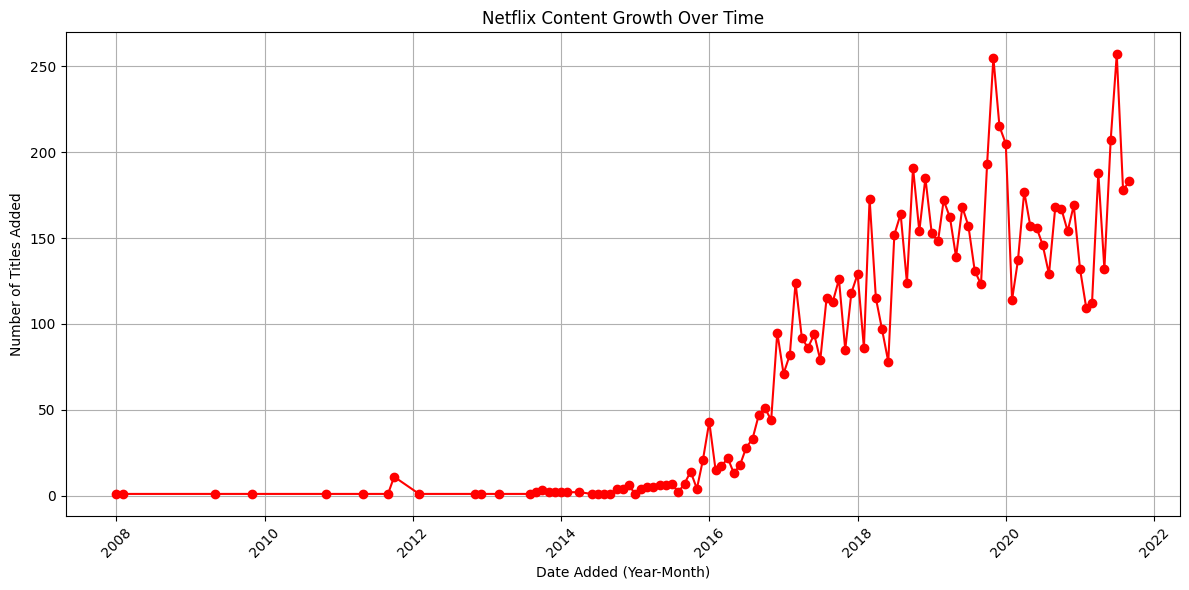

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('netflix1.csv')


df = df.dropna(subset=['date_added'])


df['date_added'] = pd.to_datetime(df['date_added'])


df['year_month'] = df['date_added'].dt.to_period('M')

content_growth = df.groupby('year_month').size().reset_index(name='count')

content_growth['year_month'] = content_growth['year_month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(content_growth['year_month'], content_growth['count'], marker = 'o' ,color='red')

plt.title('Netflix Content Growth Over Time')
plt.xlabel('Date Added (Year-Month)')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


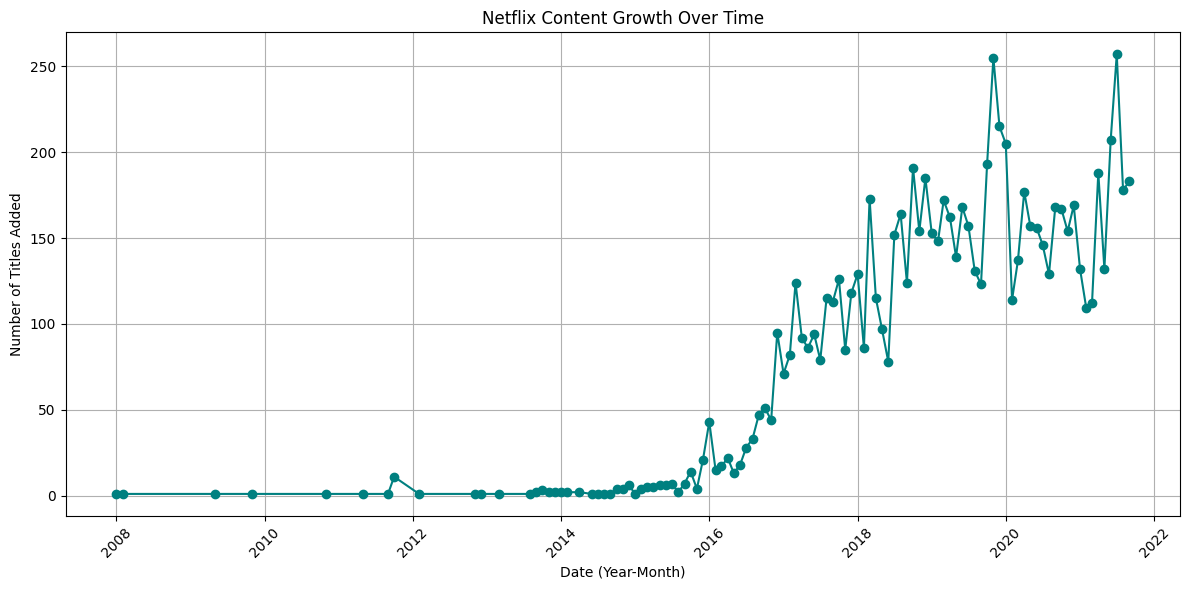

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix1.csv")

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df_clean = df.dropna(subset=['date_added'])

df_clean['year_month'] = df_clean['date_added'].dt.to_period('M')

content_growth = df_clean.groupby('year_month').size().reset_index(name='count')

content_growth['year_month'] = content_growth['year_month'].astype(str)
content_growth['year_month'] = pd.to_datetime(content_growth['year_month'])

plt.figure(figsize=(12, 6))
plt.plot(content_growth['year_month'], content_growth['count'], marker='o', color='teal', linestyle='-')
plt.title('Netflix Content Growth Over Time')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
